##IMPORT DATASET

In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ninzaami/loan-predication")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'loan-predication' dataset.
Path to dataset files: /kaggle/input/loan-predication


In [21]:
path = '/kaggle/input/loan-predication/train_u6lujuX_CVtuZ9i (1).csv'

#IMPORT LIBRARIES

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

##VIEWING DATAFRAME

In [23]:
df = pd.read_csv(path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [25]:
df.shape

(614, 13)

In [26]:
df = df.dropna()

In [27]:
df.shape

(480, 13)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [29]:
df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']].value_counts()

Gender  Married  Dependents  Education     Self_Employed  Property_Area  Loan_Status
Male    Yes      0           Graduate      No             Semiurban      Y              32
                                                          Rural          Y              19
                 2           Graduate      No             Semiurban      Y              17
                                                          Urban          Y              16
                 0           Graduate      No             Urban          Y              16
                                                                                        ..
                 3+          Graduate      Yes            Rural          Y               1
                             Not Graduate  No             Rural          Y               1
                                                          Urban          N               1
                                           Yes            Rural          Y               1
                                                          Urban          Y               1
Name: count, Length: 133, dtype: int64

In [30]:
df.replace({
    "Loan_Status": {'N': 0, 'Y': 1},
    "Gender": {'Male': 0, 'Female': 1},
    "Education": {'Not Graduate': 0, 'Graduate': 1},
    "Married": {'No': 0, 'Yes': 1},
    "Self_Employed": {'No': 0, 'Yes': 1},
    "Property_Area": {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    "Dependents": {'3+': 4}
}, inplace=True)

In [31]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [32]:
df = df.drop(columns=['Loan_ID'])

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


##Corelation Matrix

<Axes: >

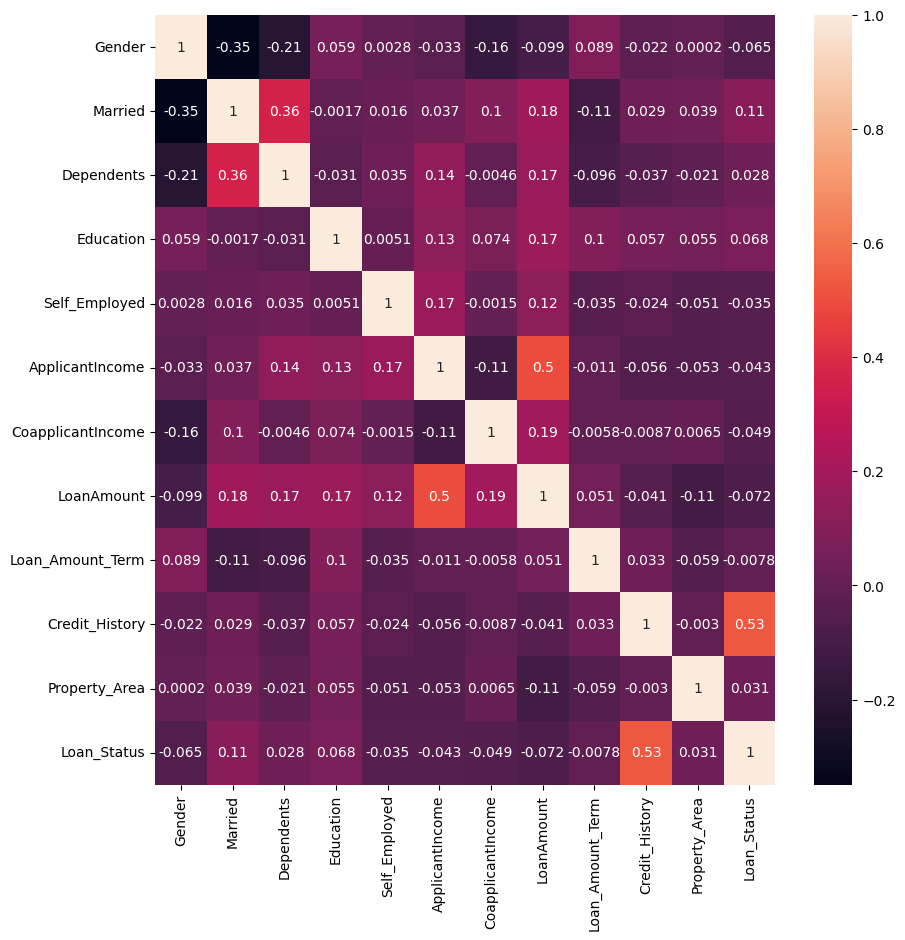

In [41]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [42]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=46)

##Logistic Regression

In [61]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
acc_lr = accuracy_score(y_test,y_pred)

##SVM

In [62]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_test,y_pred)

##KNN

In [63]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc_knn = accuracy_score(y_test,y_pred)

##Decision Tree

In [64]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = accuracy_score(y_test,y_pred)

##Gaussian Naive Bayes

In [65]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test,y_pred)

In [66]:
print("Accuracy of Logistic Regression : ",acc_lr)
print("Accuracy of Support Vector Classifier : ",acc_svc)
print("Accuracy of K-Nearest Neighbors Classifier : ",acc_knn)
print("Accuracy of Decision Tree Classifier : ",acc_dt)
print("Accuracy of Gaussian Naive Bayes Classifier : ",acc_gnb)

Accuracy of Logistic Regression :  0.875
Accuracy of Support Vector Classifier :  0.71875
Accuracy of K-Nearest Neighbors Classifier :  0.71875
Accuracy of Decision Tree Classifier :  0.75
Accuracy of Gaussian Naive Bayes Classifier :  0.8333333333333334


###Best Accuracy is given by Logistic Regression